## Q1) Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Multi Linear regrassion\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform EDA

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [75]:
data1=data.copy()  #for secuar original data

In [76]:
data1[data1.duplicated()].shape #count duplicate rows

(0, 5)

In [77]:
#rename the columns
data1=data1.rename({'R&D Spend':'r_d','Administration':'admi','Marketing Spend':'m_s','State':'st','Profit':'pf',},axis=1)
data1.head()

,r_d,admi,m_s,st,pf
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f50f23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f50f2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f50f2070>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f4fae190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f4fae4f0>],
 'means': []}

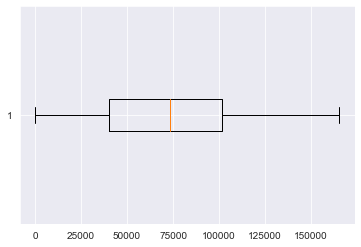

In [78]:
plt.boxplot(data1['r_d'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f4f556a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f4f39280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f4f55a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f4f39940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f4f39ca0>],
 'means': []}

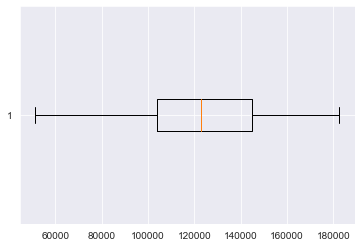

In [79]:
plt.boxplot(data1['admi'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f6d94550>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f6d94c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f6d941f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f6d9e310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f6d9e670>],
 'means': []}

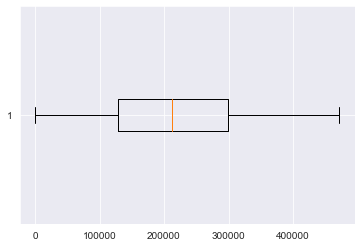

In [80]:
plt.boxplot(data1['m_s'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4f48dc4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4f48dcbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4f48dc190>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4f48d02b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4f48d0610>],
 'means': []}

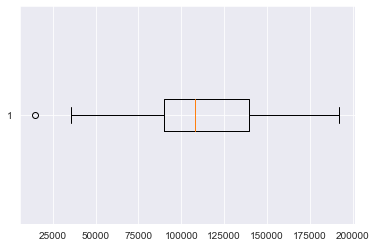

In [81]:
plt.boxplot(data1['pf'],vert=False)

<AxesSubplot:>

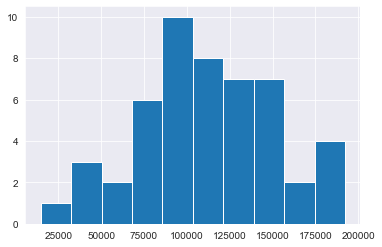

In [82]:
data1['pf'].hist()

### Transformations

In [83]:
#creat dummy variable for "st" column
data1=pd.get_dummies(data1,columns=['st'])

In [84]:
#standardezed data
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array=data1.values
scaler=StandardScaler().fit(array)
rescaledX=scaler.transform(array)
#summeries transform data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 2.016  0.561  2.154  2.011 -0.718 -0.686  1.393]
 [ 1.956  1.083  1.924  1.999  1.393 -0.686 -0.718]
 [ 1.754 -0.728  1.627  1.981 -0.718  1.458 -0.718]
 [ 1.555 -0.096  1.422  1.777 -0.718 -0.686  1.393]
 [ 1.505 -1.08   1.282  1.358 -0.718  1.458 -0.718]]


In [85]:
data1=data1.rename({'st_California':'st_cali','st_Florida':'st_flo','st_New York':'st_ny'},axis=1)

In [86]:
data1.corr()  #correlation matrix

,r_d,admi,m_s,pf,st_cali,st_flo,st_ny
r_d,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admi,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
m_s,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
pf,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
st_cali,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
st_flo,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
st_ny,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


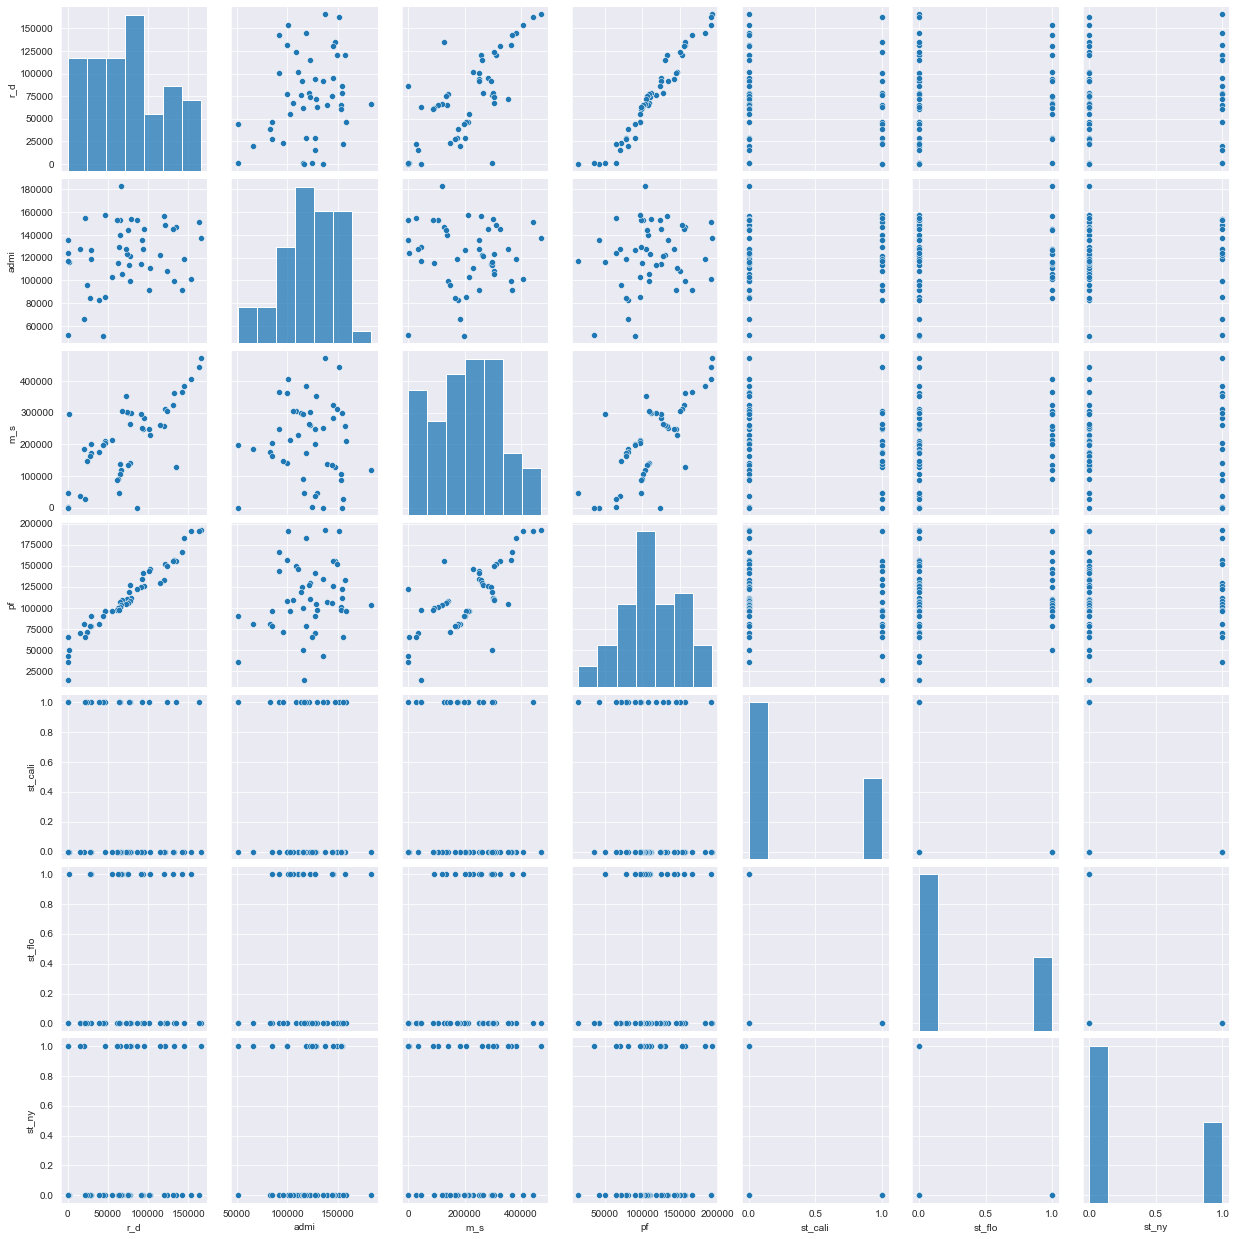

In [87]:
#scatter plot for ckecking correlatins
sns.set_style(style='darkgrid')
sns.pairplot(data1)

### Prepearing a model

In [88]:
#Build a model
import statsmodels.formula.api as smf
model=smf.ols('pf~r_d+admi+m_s+st_cali+st_flo+st_ny',data=data1).fit()

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pf   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.34e-27
Time:                        11:34:59   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
r_d            0.8060      0.046     17.369      0.000       0.712       0.900
admi          -0.0270      0.052     -0.517      0.608      -0.132       0.078
m_s            0.0270      0.017      1.574      0.123      -0.008       0.062
st_cali     1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
st_flo      1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
st_ny       1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
#t and p values
(model.tvalues,model.pvalues)

(Intercept     7.417409
 r_d          17.368580
 admi         -0.517012
 m_s           1.573889
 st_cali       5.099242
 st_flo        4.654306
 st_ny         5.007401
 dtype: float64,
 Intercept    2.807645e-09
 r_d          2.578772e-21
 admi         6.077373e-01
 m_s          1.226769e-01
 st_cali      6.942555e-06
 st_flo       2.992503e-05
 st_ny        9.409010e-06
 dtype: float64)

#### p values of "admi" and "m_s" >0.05 so check collinearity

In [91]:
#Simple Linear regression
ml_admi=smf.ols('pf~admi',data=data1).fit()
(ml_admi.tvalues,ml_admi.pvalues)

(Intercept    3.040044
 admi         1.419493
 dtype: float64,
 Intercept    0.003824
 admi         0.162217
 dtype: float64)

In [92]:
ml_m_s=smf.ols('pf~m_s',data=data1).fit()
(ml_m_s.tvalues,ml_m_s.pvalues)

(Intercept    7.808356
 m_s          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 m_s          4.381073e-10
 dtype: float64)

In [93]:
# admi and m_s
ml_a_m=smf.ols('pf~admi+m_s',data=data1).fit()
(ml_a_m.tvalues,ml_a_m.pvalues)

(Intercept    1.142741
 admi         2.467779
 m_s          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admi         1.729198e-02
 m_s          9.727245e-11
 dtype: float64)

In [94]:
#calculate VIF(variance inflation factor)
rsq_r_d=smf.ols('r_d~admi+m_s+st_cali+st_flo+st_ny',data=data1).fit().rsquared
vif_r_d=1/(1-rsq_r_d)
rsq_admi=smf.ols('admi~r_d+m_s+st_cali+st_flo+st_ny',data=data1).fit().rsquared
vif_admi=1/(1-rsq_admi)
rsq_m_s=smf.ols('m_s~admi+r_d+st_cali+st_flo+st_ny',data=data1).fit().rsquared
vif_m_s=1/(1-rsq_m_s)
rsq_st_cali=smf.ols('st_cali~admi+m_s+r_d+st_flo+st_ny',data=data1).fit().rsquared
vif_st_cali=1/(1-rsq_st_cali)
rsq_st_flo=smf.ols('st_flo~admi+m_s+st_cali+r_d+st_ny',data=data1).fit().rsquared
vif_st_flo=1/(1-rsq_st_flo)
rsq_st_ny=smf.ols('st_ny~admi+m_s+st_cali+st_flo+r_d',data=data1).fit().rsquared
vif_st_ny=1/(1-rsq_st_ny)
d1={'variables':['r_d','admi','m_s','st_cali','st_flo','st_ny'],'VIF':[vif_r_d,vif_admi,vif_m_s,vif_st_cali,vif_st_flo,vif_st_ny]}
vif_frame=pd.DataFrame(d1)
vif_frame

<ipython-input-94-cc1c2b776735>:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif_st_cali=1/(1-rsq_st_cali)
<ipython-input-94-cc1c2b776735>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_st_flo=1/(1-rsq_st_flo)
<ipython-input-94-cc1c2b776735>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif_st_ny=1/(1-rsq_st_ny)


,variables,VIF
0,r_d,2.495511
1,admi,1.177766
2,m_s,2.416797
3,st_cali,inf
4,st_flo,inf
5,st_ny,inf


## Residual analysis

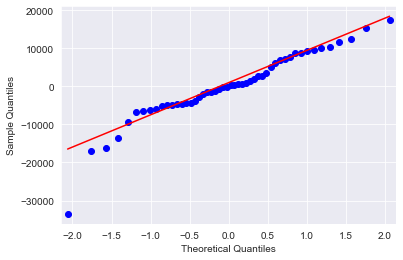

In [95]:
#detecting influence/outliers
# Test for normality residual (Q-Q plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')

In [96]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [97]:
list(np.where(model.resid>20000))

[array([], dtype=int64)]

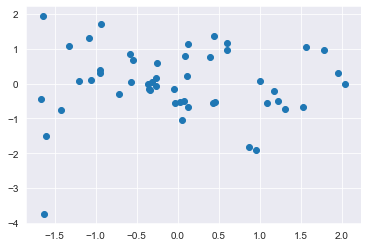

In [98]:
#error vs fitted values
def set_standardized_values (vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(set_standardized_values(model.fittedvalues),set_standardized_values(model.resid))
plt.show()

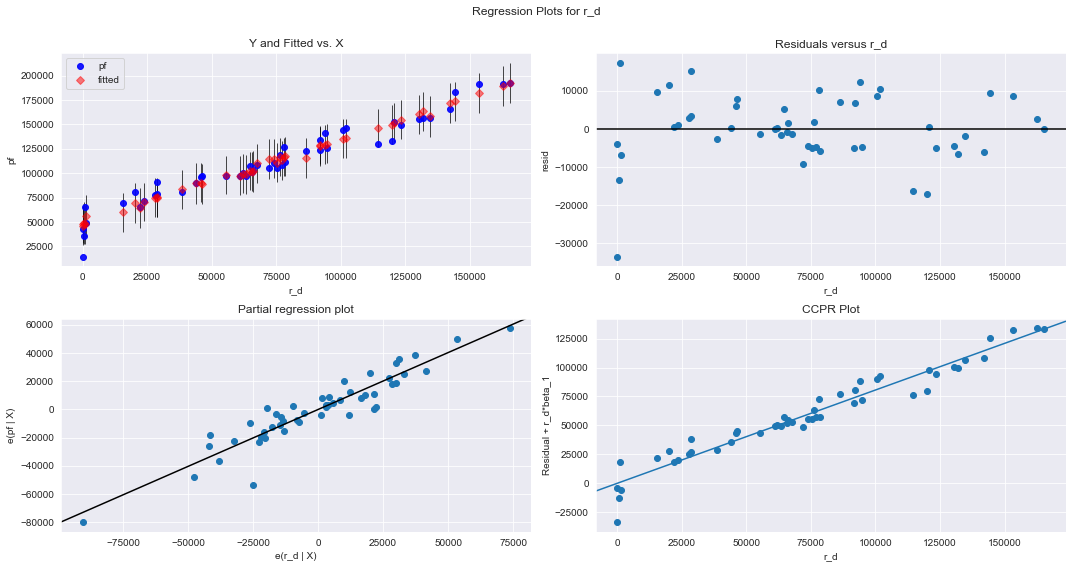

In [99]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"r_d",fig=fig)

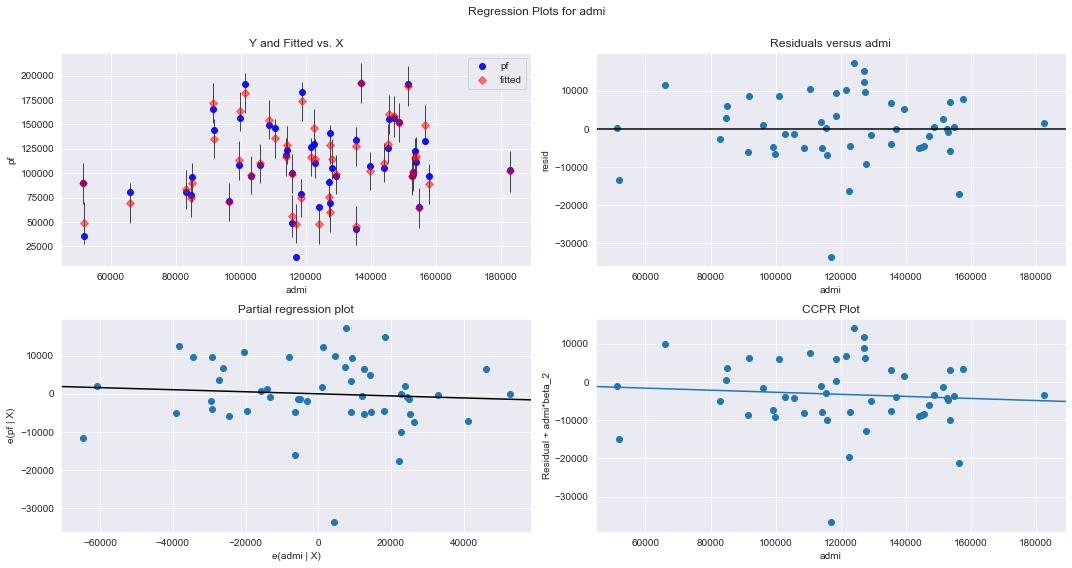

In [100]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"admi",fig=fig)

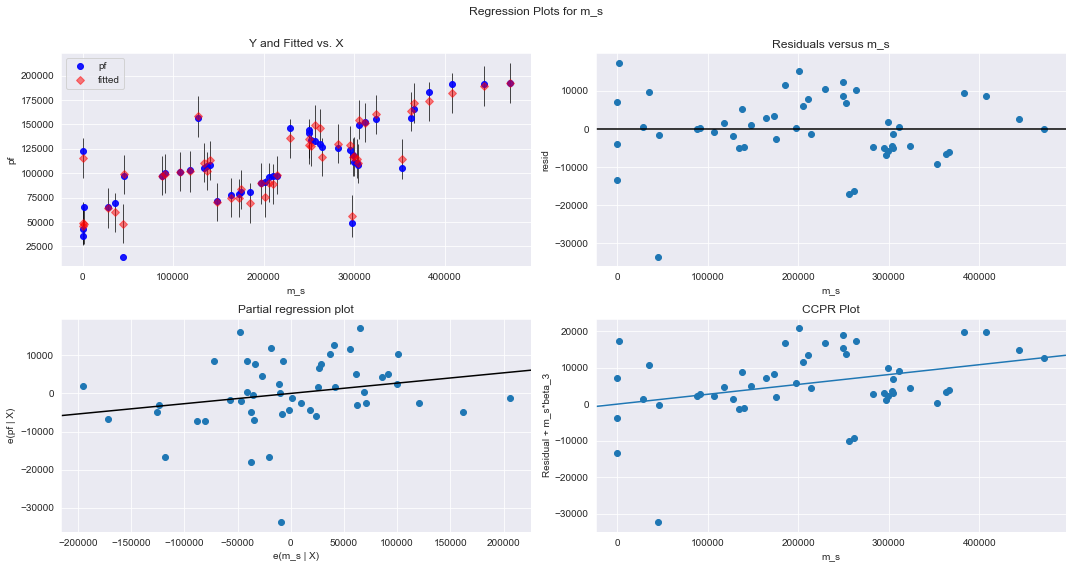

In [101]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"m_s",fig=fig)

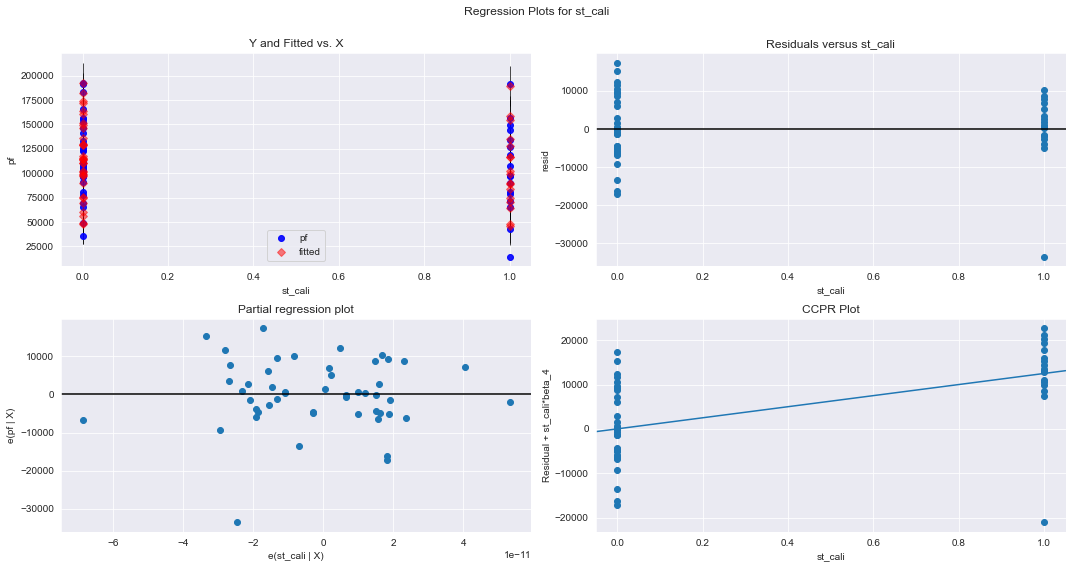

In [102]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"st_cali",fig=fig)

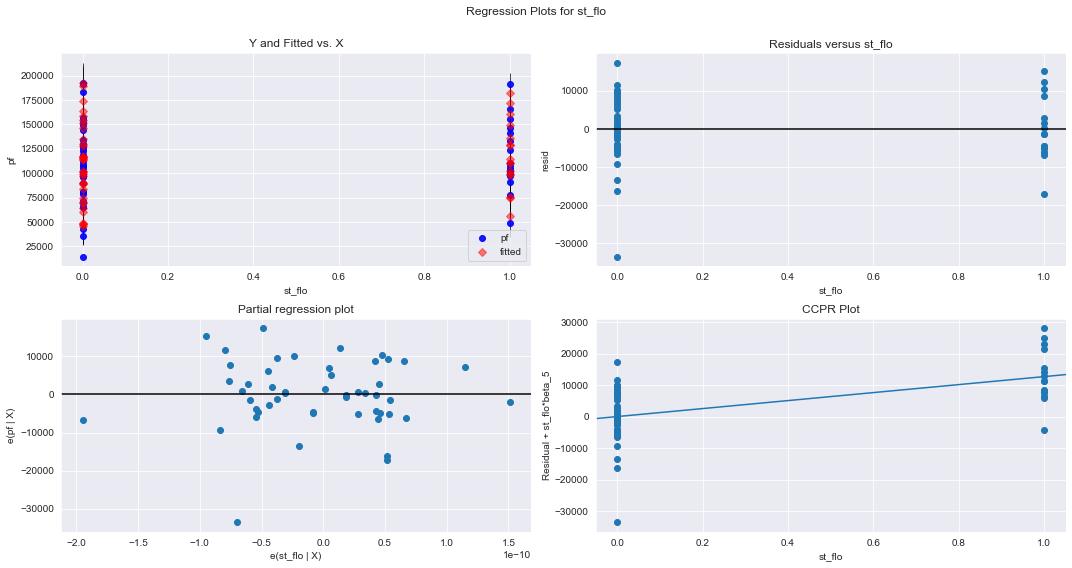

In [103]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"st_flo",fig=fig)

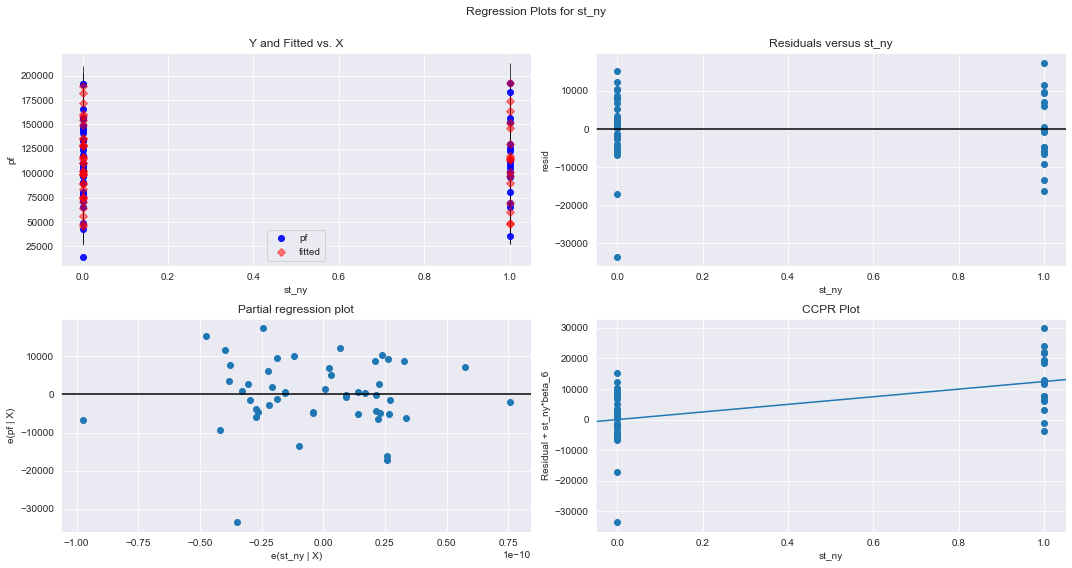

In [104]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"st_ny",fig=fig)

## Cook,s Distance

In [105]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

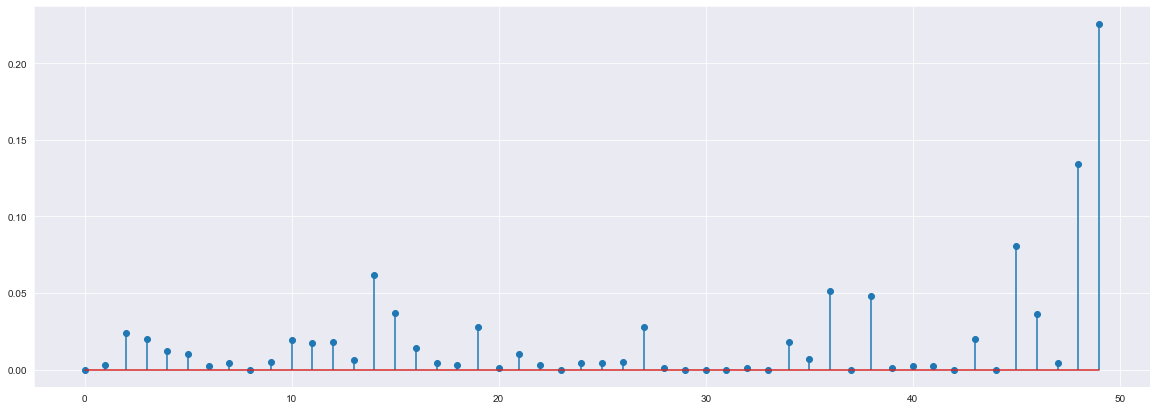

In [106]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))

In [107]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

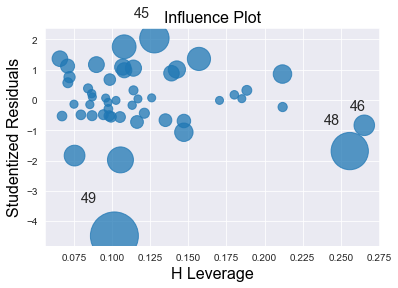

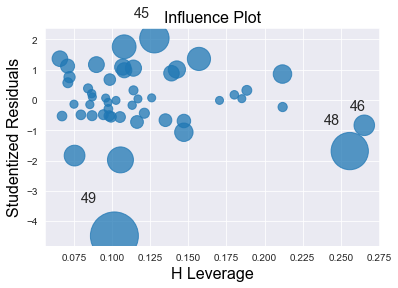

In [108]:
#influence plot
influence_plot(model)

##### We see that no influence/outliers

In [109]:
final_ml=smf.ols('pf~r_d+m_s+st_cali+st_flo+st_ny',data=data1).fit()

In [110]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pf   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           9.72e-29
Time:                        11:35:15   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
r_d            0.7967      0.042     18.771      0.000       0.711       0.882
m_s            0.0298      0.016      1.842      0.072      -0.003       0.062
st_cali     1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
st_flo      1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
st_ny       1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     2.19e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
d2={'Parameters':['R^2','R^2_adj','AIC'],'Model Values':[model.rsquared,model.rsquared_adj,model.aic],'Final Model values':[final_ml.rsquared,final_ml.rsquared_adj,final_ml.aic]}

In [112]:
table=pd.DataFrame(d2)
table

,Parameters,Model Values,Final Model values
0,R^2,0.950752,0.950453
1,R^2_adj,0.945156,0.946049
2,AIC,1062.764910,1061.067742


## Predicting for new data points

In [114]:
newdata=pd.DataFrame({'r_d':75000,'admi':120000,'m_s':220000,'st_cali':1,'st_flo':0,'st_ny':1},index=[1])
newdata

,r_d,admi,m_s,st_cali,st_flo,st_ny
1,75000,120000,220000,1,0,1


In [115]:
final_ml.predict(newdata)

1    124949.674376
dtype: float64

In [120]:
#we can pass whole data
final_ml.predict(data1.iloc[0:5,])

0    192716.045225
1    189713.718878
2    181489.428305
3    173367.500227
4    171216.444327
dtype: float64